In [2]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

# Load the dataset into a Pandas dataframe
students_df = pd.read_csv('data/row_data.csv')

### Data Quality Check

In [4]:
# Check the data types of the variables
# print("\nData types:")
# print(students_df.dtypes)

# Check the first few rows of the dataset
print("\nFirst few rows:\n", students_df.head())

# Calculate the summary statistics for all columns
summary = students_df.describe().transpose().round(2)
summary = summary.rename(columns={'50%': 'median', 'std': 'sd'}) # Change 50% to median

# Add columns for the number of missing values and the completeness rate
summary['n_missing'] = students_df.isnull().sum()
summary['complete_rate'] = 1 - (students_df.isnull().sum() / len(students_df))

# Print the summary statistics
print("\nSummary statistics\n",
      summary[['mean', 'sd', 'min', '25%', 'median', '75%', 'max', 'n_missing', 'complete_rate']])

# Check the missing values in the dataset
print("Missing values:\n", students_df.isnull().sum())



First few rows:
    Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                   

In [5]:
def cleanse_data(df):
    # Rename specific columns
    df.rename(columns={
        'Nacionality': 'Nationality',
        "Mother's qualification": 'Mothers_qualification',
        "Father's qualification": 'Fathers_qualification',
        "Mother's occupation": 'Mothers_occupation',
        "Father's occupation": 'Fathers_occupation',
        'Daytime/evening attendance': 'Daytime_evening_attendance',
        'Curricular units 1st sem (credited)': 'Curricular_units_1st_sem_credited',
        'Curricular units 1st sem (enrolled)': 'Curricular_units_1st_sem_enrolled',
        'Curricular units 1st sem (evaluations)': 'Curricular_units_1st_sem_evaluations',
        'Curricular units 1st sem (approved)': 'Curricular_units_1st_sem_approved',
        'Curricular units 1st sem (grade)': 'Curricular_units_1st_sem_grade',
        'Curricular units 1st sem (without evaluations)': 'Curricular_units_1st_sem_without_evaluations',
        'Curricular units 2nd sem (credited)': 'Curricular_units_2nd_sem_credited',
        'Curricular units 2nd sem (enrolled)': 'Curricular_units_2nd_sem_enrolled',
        'Curricular units 2nd sem (evaluations)': 'Curricular_units_2nd_sem_evaluations',
        'Curricular units 2nd sem (approved)': 'Curricular_units_2nd_sem_approved',
        'Curricular units 2nd sem (grade)': 'Curricular_units_2nd_sem_grade',
        'Curricular units 2nd sem (without evaluations)': 'Curricular_units_2nd_sem_without_evaluations',
    }, inplace=True)
    
    # Replace spaces with underscores in all column names
    df.columns = df.columns.str.replace(' ', '_')
    
    # Handle missing values
    df.fillna({
        'Marital_Status': 'Unknown',
        'Nationality': 'Unknown',
        'Mothers_qualification': 'Unknown',
        'Fathers_qualification': 'Unknown',
        'Mothers_occupation': 'Unknown',
        'Fathers_occupation': 'Unknown',
        'Displaced': 'No',
        'Educational_special_needs': 'No',
        'Debtor': 'No',
        'Tuition_fees_up_to_date': 'Yes',
        'Gender': 'Unknown',
        'Scholarship_holder': 'No',
        'International': 'No'
    }, inplace=True)
    
    # Convert data types if needed
    numeric_cols = [
        'Application_mode', 'Application_order', 'Admission_grade', 'Age_at_enrollment',
        'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 
        'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 
        'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations',
        'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 
        'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 
        'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations',
        'Unemployment_rate', 'Inflation_rate', 'GDP'
    ]
    
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Save the cleaned data to a CSV file
    df.to_csv('data/cleaned_data.csv', index=False)

    return df

df_clean = cleanse_data(students_df)
print(df_clean.head())

   Marital_Status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_(grade)  Nationality  Mothers_qualification  \
0                           122.0            1                     19   
1                           160.0            1                      1   
2                           122.0        

### Get Duplicate Rows

In [6]:

# Display number of duplicated rows
print("Number of duplicated rows: ",students_df.duplicated().sum())

# Display rows with duplicates
# print(students_df[students_df.duplicated()])

Number of duplicated rows:  0


### Get Unique Values


In [7]:

# Get no of Unique values in every column
for col in students_df.columns:
    if len(students_df[col].unique()) < 10:
        print(f"{col} has {len(students_df[col].unique())} unique values; Repeated values are {sorted(students_df[col].unique())}")
    else:
        print(f"{col} has {len(students_df[col].unique())} values")
     

Marital_Status has 6 unique values; Repeated values are [1, 2, 3, 4, 5, 6]
Application_mode has 18 values
Application_order has 8 unique values; Repeated values are [0, 1, 2, 3, 4, 5, 6, 9]
Course has 17 values
Daytime_evening_attendance has 2 unique values; Repeated values are [0, 1]
Previous_qualification has 17 values
Previous_qualification_(grade) has 101 values
Nationality has 21 values
Mothers_qualification has 29 values
Fathers_qualification has 34 values
Mothers_occupation has 32 values
Fathers_occupation has 46 values
Admission_grade has 620 values
Displaced has 2 unique values; Repeated values are [0, 1]
Educational_special_needs has 2 unique values; Repeated values are [0, 1]
Debtor has 2 unique values; Repeated values are [0, 1]
Tuition_fees_up_to_date has 2 unique values; Repeated values are [0, 1]
Gender has 2 unique values; Repeated values are [0, 1]
Scholarship_holder has 2 unique values; Repeated values are [0, 1]
Age_at_enrollment has 46 values
International has 2 uni

### Individual Variables Quality Check

In [10]:
# Defining categorical and quantitative columns based on the new column names
categorical_cols = ["Marital_Status", "Application_mode", "Application_order", "Course", "Daytime_evening_attendance",
                    "Previous_qualification", "Nationality", "Mothers_qualification", "Fathers_qualification", "Mothers_occupation",
                    "Fathers_occupation", "Displaced", "Educational_special_needs", "Debtor", "Tuition_fees_up_to_date", "Gender",
                    "Scholarship_holder", "International", "Target"]

quantitative_cols = ['Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations',
                  'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations',
                  'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations',
                  'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations',
                  'Age_at_enrollment', 'Inflation_rate', 'GDP', 'Unemployment_rate']

### Table Distribution and Box Plots for Categorical Columns


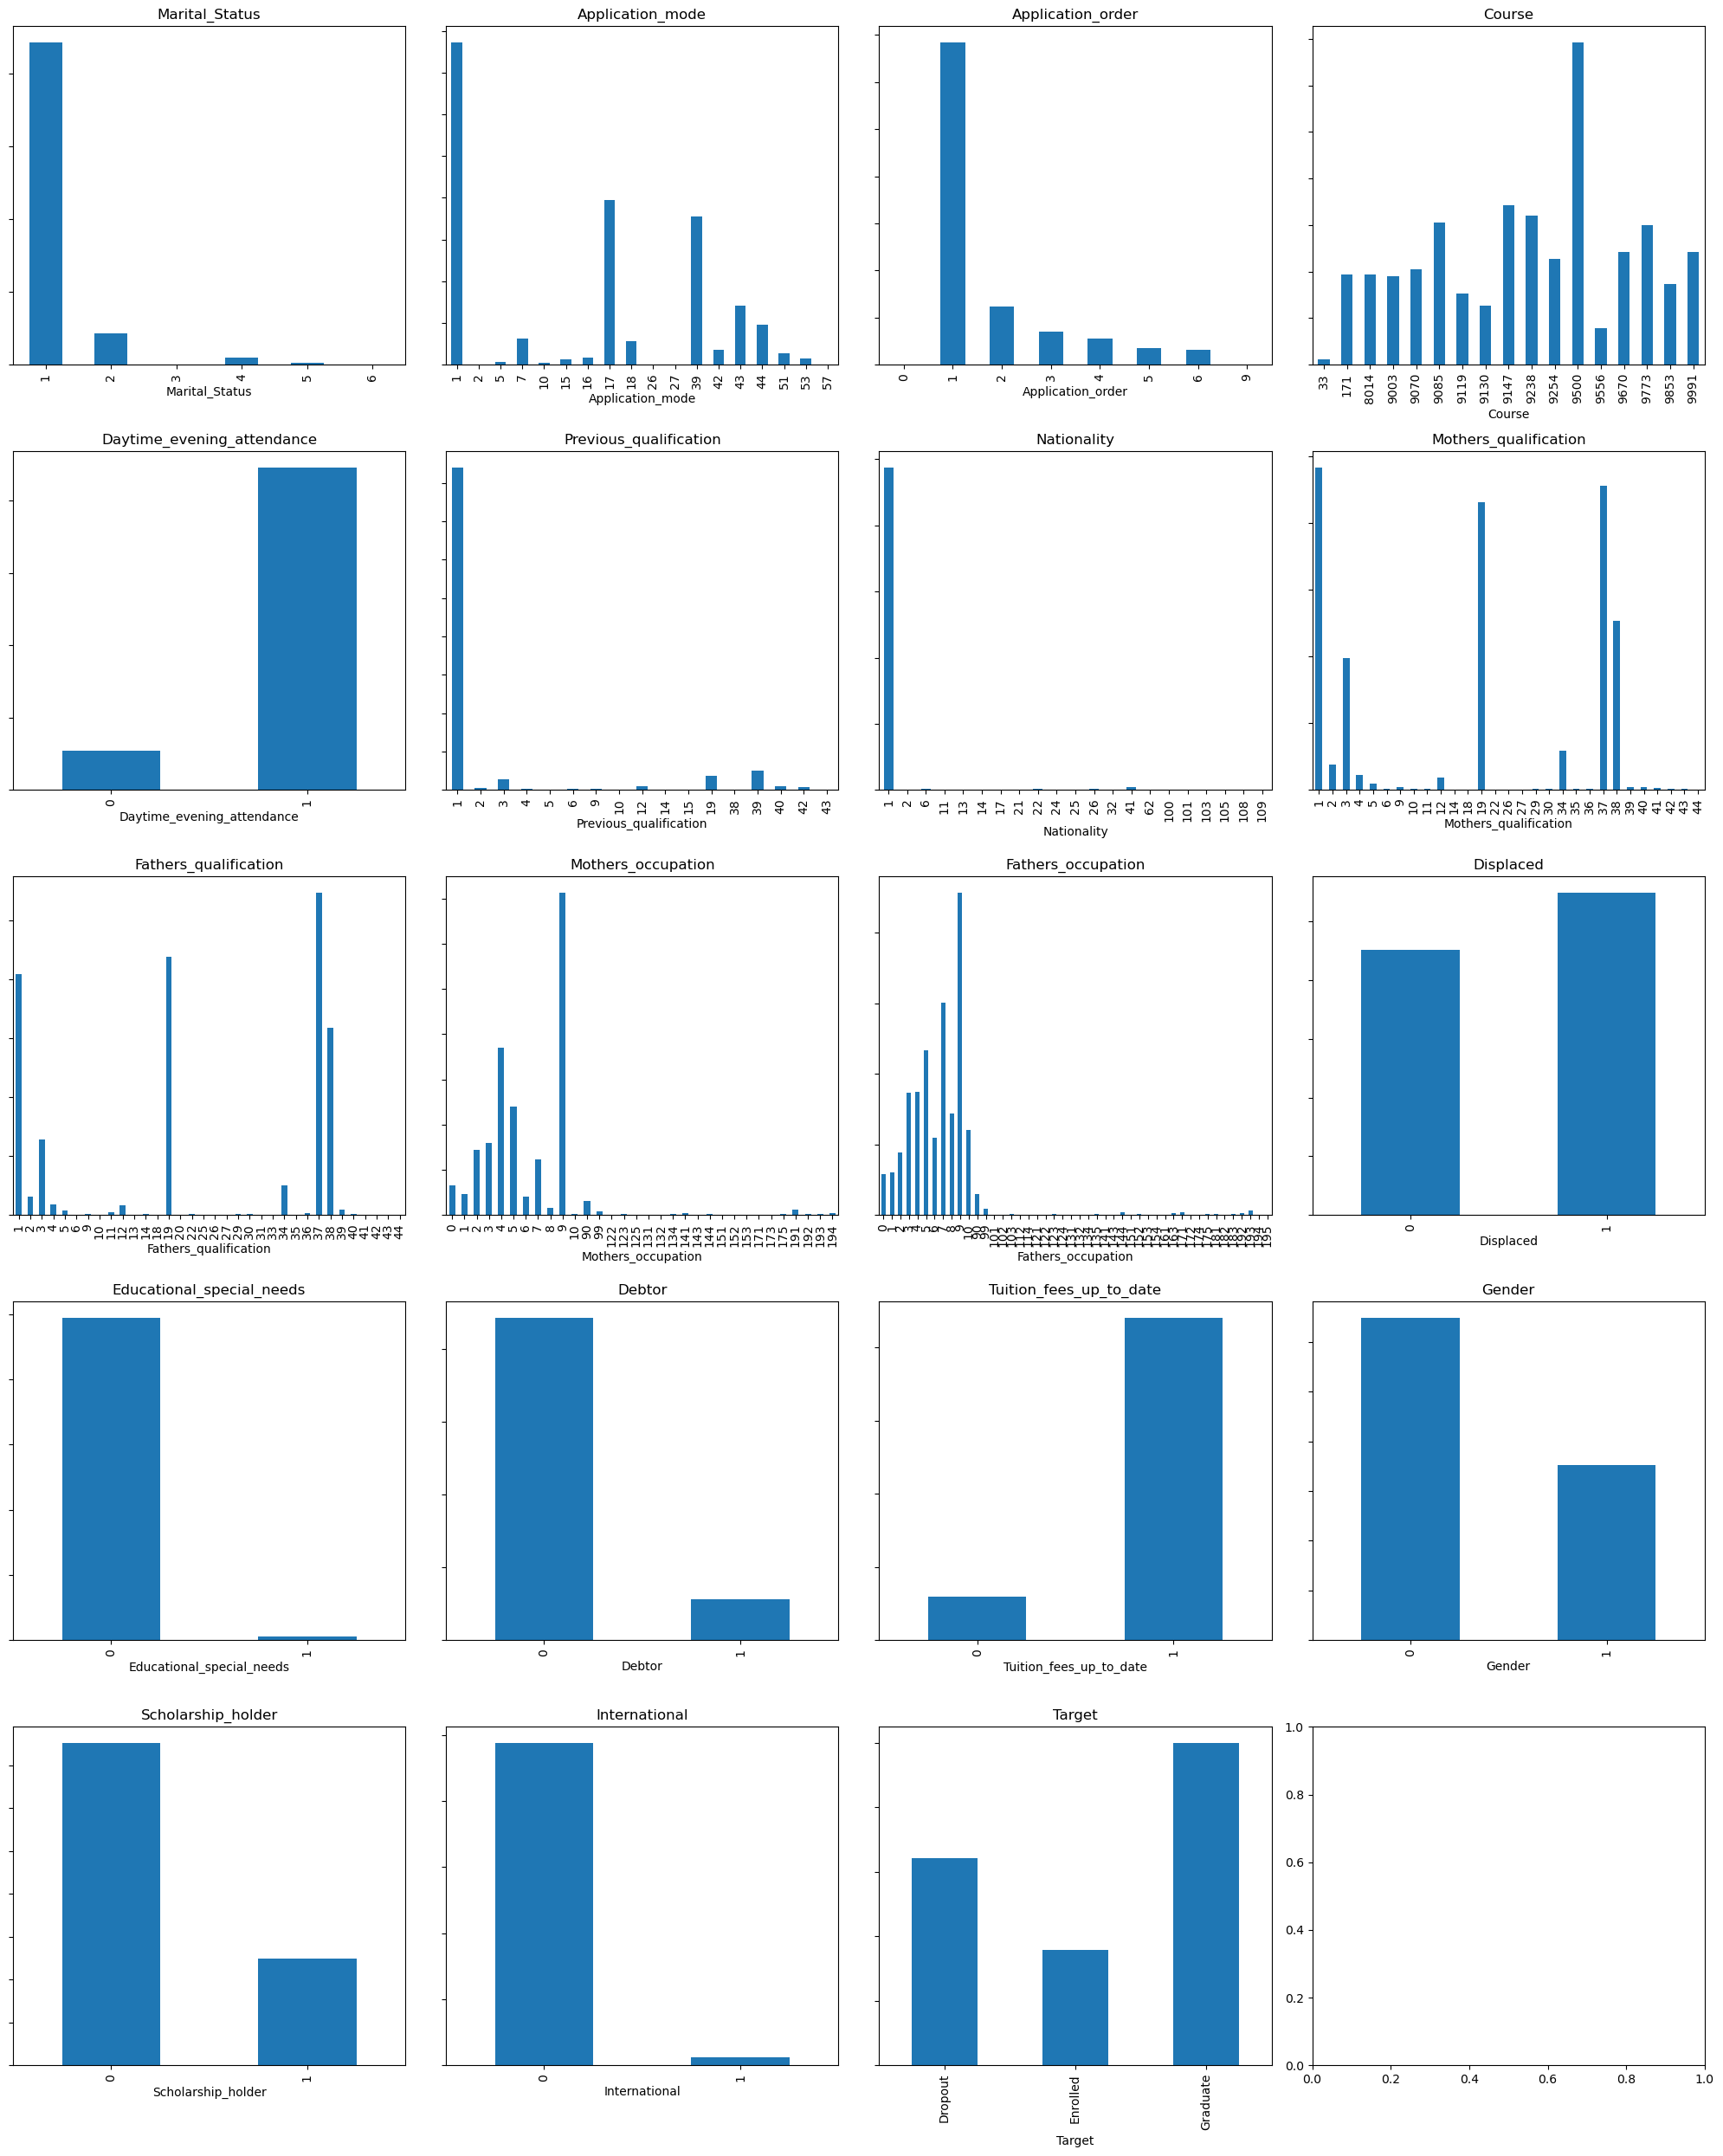

In [11]:

# loop through categorical columns and create barplot for each
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
for i, col in enumerate(categorical_cols):
    row_idx = i // 4
    col_idx = i % 4
    vc = students_df[col].value_counts(normalize=True)
    vc = vc.sort_index() # sort by category name
    vc.plot(kind="bar", ax=axes[row_idx, col_idx], rot=0)
    axes[row_idx, col_idx].set_title(col)
    for tick in axes[row_idx, col_idx].get_xticklabels():
        tick.set_rotation(90)
    for tick in axes[row_idx, col_idx].get_yticklabels():
        tick.set_visible(False)
fig.tight_layout()
plt.savefig('images/boxplotCatergricalCols.jpg', dpi=300)
plt.show()
plt.clf()